In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Import pickled dataframes

In [2]:
import pickle

In [3]:
with open('all_data.pickle','rb') as read_file:
    all_data_df = pickle.load(read_file)
    
all_data_df.head(5)

,CoC Number,CoC Name,city,state,CoC Category,land_area,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,pop_density_2016,pop_density_2015,pop_density_2014,pop_density_2013,pop_density_2012,pop_density_2011,pop_density_2010,pop_density_2009,pop_density_2008,pop_density_2007
0,AK-500,Anchorage CoC,Anchorage,AK,Other Urban CoCs,1704.68,1094,1128,1105,1208,...,174.352958,174.585846,175.943286,176.663655,174.949551,173.729967,171.191074,168.757186,165.165310,163.545064
1,AK-501,Alaska Balance of State CoC,Anchorage,AK,Rural CoCs,1704.68,922,717,835,748,...,174.352958,174.585846,175.943286,176.663655,174.949551,173.729967,171.191074,168.757186,165.165310,163.545064
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Birmingham,AL,Suburban CoCs,146.07,901,1092,1228,1153,...,1447.497775,1449.325666,1445.259122,1446.087492,1442.794551,1448.387759,1452.981447,1467.748340,1482.200315,1498.459643
3,AL-501,Mobile City & County/Baldwin County CoC,Mobile,AL,Other Urban CoCs,139.11,551,606,623,578,...,1379.376033,1382.912803,1387.240313,1391.380922,1393.559054,1394.522320,1402.566314,1407.202933,1408.345913,1405.578319
4,AL-502,Florence/Northwest Alabama CoC,Florence,AL,Rural CoCs,26.00,256,155,337,245,...,1536.538462,1534.884615,1545.576923,1536.846154,1528.076923,1520.461538,1512.269231,1507.000000,1502.769231,1479.884615


In [14]:
with open('percent_df.pickle','rb') as read_file:
    percent_df = pickle.load(read_file)
    
percent_df.head(5)

,CoC Number,percent_homeless_2018,percent_homeless_2017,percent_homeless_2016,percent_homeless_2015,percent_homeless_2014,percent_homeless_2013,percent_homeless_2012,percent_homeless_2011,percent_homeless_2010,percent_homeless_2009,percent_homeless_2008,percent_homeless_2007
0,AK-500,0.003753,0.003833,0.003718,0.004059,0.003411,0.003726,0.003846,0.004130,0.004218,0.004404,0.003633,0.003494
1,AK-501,0.003163,0.002437,0.002809,0.002513,0.002537,0.002736,0.002568,0.003056,0.002166,0.002520,0.002213,0.002396
2,AL-500,0.004293,0.005176,0.005808,0.005446,0.006295,0.006955,0.008100,0.009217,0.010710,0.010602,0.009718,0.009613
3,AL-501,0.002907,0.003181,0.003247,0.003005,0.003099,0.002547,0.003270,0.003701,0.004526,0.003816,0.002675,0.003319
4,AL-502,0.006332,0.003873,0.008436,0.006139,0.005201,0.005581,0.004833,0.006172,0.004324,0.007172,0.006373,0.006887


In [15]:
with open('density_df.pickle','rb') as read_file:
    density_df = pickle.load(read_file)
    
density_df.head(5)

,CoC Number,pop_density_2018,pop_density_2017,pop_density_2016,pop_density_2015,pop_density_2014,pop_density_2013,pop_density_2012,pop_density_2011,pop_density_2010,pop_density_2009,pop_density_2008,pop_density_2007
0,AK-500,171.022127,172.621254,174.352958,174.585846,175.943286,176.663655,174.949551,173.729967,171.191074,168.757186,165.165310,163.545064
1,AK-501,171.022127,172.621254,174.352958,174.585846,175.943286,176.663655,174.949551,173.729967,171.191074,168.757186,165.165310,163.545064
2,AL-500,1436.845348,1444.280140,1447.497775,1449.325666,1445.259122,1446.087492,1442.794551,1448.387759,1452.981447,1467.748340,1482.200315,1498.459643
3,AL-501,1362.748904,1369.427072,1379.376033,1382.912803,1387.240313,1391.380922,1393.559054,1394.522320,1402.566314,1407.202933,1408.345913,1405.578319
4,AL-502,1554.923077,1539.307692,1536.538462,1534.884615,1545.576923,1536.846154,1528.076923,1520.461538,1512.269231,1507.000000,1502.769231,1479.884615


# Create columns: Change in Percent Homeless by Year

In [34]:
all_data_delta = all_data_df.copy()

In [35]:
all_data_delta.columns

Index(['CoC Number', 'CoC Name', 'city', 'state', 'CoC Category', 'land_area',
       'Overall Homeless, 2018', 'Overall Homeless, 2017',
       'Overall Homeless, 2016', 'Overall Homeless, 2015',
       'Overall Homeless, 2014', 'Overall Homeless, 2013',
       'Overall Homeless, 2012', 'Overall Homeless, 2011',
       'Overall Homeless, 2010', 'Overall Homeless, 2009',
       'Overall Homeless, 2008', 'Overall Homeless, 2007', 'pop_2018',
       'pop_2017', 'pop_2016', 'pop_2015', 'pop_2014', 'pop_2013', 'pop_2012',
       'pop_2011', 'pop_2010', 'pop_2009', 'pop_2008', 'pop_2007',
       'percent_homeless_2018', 'percent_homeless_2017',
       'percent_homeless_2016', 'percent_homeless_2015',
       'percent_homeless_2014', 'percent_homeless_2013',
       'percent_homeless_2012', 'percent_homeless_2011',
       'percent_homeless_2010', 'percent_homeless_2009',
       'percent_homeless_2008', 'percent_homeless_2007', 'pop_density_2018',
       'pop_density_2017', 'pop_density_2016', 

In [36]:
all_data_delta["percent_change_17_18"] = all_data_delta["percent_homeless_2018"] - all_data_delta["percent_homeless_2017"]

In [38]:
all_data_delta[["CoC Number","city","state","percent_change_17_18"]].describe()

,percent_change_17_18
count,347.000000
mean,-0.000512
std,0.005946
min,-0.076253
25%,-0.000566
50%,-0.000001
75%,0.000500
max,0.015581


In [39]:
all_data_delta["percent_change_16_17"] = all_data_delta["percent_homeless_2017"] - all_data_delta["percent_homeless_2016"]

In [40]:
all_data_delta["percent_change_15_16"] = all_data_delta["percent_homeless_2016"] - all_data_delta["percent_homeless_2015"]
all_data_delta["percent_change_14_15"] = all_data_delta["percent_homeless_2015"] - all_data_delta["percent_homeless_2014"]
all_data_delta["percent_change_13_14"] = all_data_delta["percent_homeless_2014"] - all_data_delta["percent_homeless_2013"]
all_data_delta["percent_change_12_13"] = all_data_delta["percent_homeless_2013"] - all_data_delta["percent_homeless_2012"]
all_data_delta["percent_change_11_12"] = all_data_delta["percent_homeless_2012"] - all_data_delta["percent_homeless_2011"]
all_data_delta["percent_change_10_11"] = all_data_delta["percent_homeless_2011"] - all_data_delta["percent_homeless_2010"]
all_data_delta["percent_change_09_10"] = all_data_delta["percent_homeless_2010"] - all_data_delta["percent_homeless_2009"]
all_data_delta["percent_change_08_09"] = all_data_delta["percent_homeless_2009"] - all_data_delta["percent_homeless_2008"]
all_data_delta["percent_change_07_08"] = all_data_delta["percent_homeless_2008"] - all_data_delta["percent_homeless_2007"]



In [41]:
all_data_delta.columns

Index(['CoC Number', 'CoC Name', 'city', 'state', 'CoC Category', 'land_area',
       'Overall Homeless, 2018', 'Overall Homeless, 2017',
       'Overall Homeless, 2016', 'Overall Homeless, 2015',
       'Overall Homeless, 2014', 'Overall Homeless, 2013',
       'Overall Homeless, 2012', 'Overall Homeless, 2011',
       'Overall Homeless, 2010', 'Overall Homeless, 2009',
       'Overall Homeless, 2008', 'Overall Homeless, 2007', 'pop_2018',
       'pop_2017', 'pop_2016', 'pop_2015', 'pop_2014', 'pop_2013', 'pop_2012',
       'pop_2011', 'pop_2010', 'pop_2009', 'pop_2008', 'pop_2007',
       'percent_homeless_2018', 'percent_homeless_2017',
       'percent_homeless_2016', 'percent_homeless_2015',
       'percent_homeless_2014', 'percent_homeless_2013',
       'percent_homeless_2012', 'percent_homeless_2011',
       'percent_homeless_2010', 'percent_homeless_2009',
       'percent_homeless_2008', 'percent_homeless_2007', 'pop_density_2018',
       'pop_density_2017', 'pop_density_2016', 

In [42]:
delta_percent = all_data_delta[["CoC Number","city","state","percent_change_17_18",'percent_change_16_17', 'percent_change_15_16', 'percent_change_14_15',
       'percent_change_13_14', 'percent_change_12_13', 'percent_change_11_12',
       'percent_change_10_11', 'percent_change_09_10', 'percent_change_08_09',
       'percent_change_07_08']]

In [43]:
delta_percent.describe()

,percent_change_17_18,percent_change_16_17,percent_change_15_16,percent_change_14_15,percent_change_13_14,percent_change_12_13,percent_change_11_12,percent_change_10_11,percent_change_09_10,percent_change_08_09,percent_change_07_08
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,-0.000512,-0.000293,-0.000969,-0.001774,-0.002043,0.000008,-0.000171,-0.002166,0.000667,0.001222,-0.000031
std,0.005946,0.011653,0.006457,0.011298,0.014892,0.018307,0.005046,0.023702,0.017905,0.015352,0.016518
min,-0.076253,-0.057210,-0.062311,-0.152824,-0.250414,-0.150765,-0.030091,-0.346504,-0.091870,-0.065228,-0.123438
25%,-0.000566,-0.000797,-0.001021,-0.001137,-0.000909,-0.001295,-0.000778,-0.001236,-0.000279,-0.000916,-0.000800
50%,-0.000001,-0.000137,-0.000223,-0.000239,-0.000151,-0.000177,-0.000127,-0.000105,-0.000005,0.000121,-0.000083
75%,0.000500,0.000306,0.000254,0.000375,0.000262,0.000565,0.000423,0.000915,0.000455,0.001195,0.000256
max,0.015581,0.137839,0.042449,0.046478,0.021575,0.252785,0.031076,0.047474,0.283323,0.145240,0.228931


In [44]:
density_df.columns

Index(['CoC Number', 'pop_density_2018', 'pop_density_2017',
       'pop_density_2016', 'pop_density_2015', 'pop_density_2014',
       'pop_density_2013', 'pop_density_2012', 'pop_density_2011',
       'pop_density_2010', 'pop_density_2009', 'pop_density_2008',
       'pop_density_2007'],
      dtype='object')

# Create columns: Change in Population Density by Year

In [45]:
all_data_delta["density_change_17_18"] = all_data_delta["pop_density_2018"] - all_data_delta["pop_density_2017"]
all_data_delta["density_change_16_17"] = all_data_delta["pop_density_2017"] - all_data_delta["pop_density_2016"]
all_data_delta["density_change_15_16"] = all_data_delta["pop_density_2016"] - all_data_delta["pop_density_2015"]
all_data_delta["density_change_14_15"] = all_data_delta["pop_density_2015"] - all_data_delta["pop_density_2014"]
all_data_delta["density_change_13_14"] = all_data_delta["pop_density_2014"] - all_data_delta["pop_density_2013"]
all_data_delta["density_change_12_13"] = all_data_delta["pop_density_2013"] - all_data_delta["pop_density_2012"]
all_data_delta["density_change_11_12"] = all_data_delta["pop_density_2012"] - all_data_delta["pop_density_2011"]
all_data_delta["density_change_10_11"] = all_data_delta["pop_density_2011"] - all_data_delta["pop_density_2010"]
all_data_delta["density_change_09_10"] = all_data_delta["pop_density_2010"] - all_data_delta["pop_density_2009"]
all_data_delta["density_change_08_09"] = all_data_delta["pop_density_2009"] - all_data_delta["pop_density_2008"]
all_data_delta["density_change_07_08"] = all_data_delta["pop_density_2008"] - all_data_delta["pop_density_2007"]



In [46]:
all_data_delta.columns

Index(['CoC Number', 'CoC Name', 'city', 'state', 'CoC Category', 'land_area',
       'Overall Homeless, 2018', 'Overall Homeless, 2017',
       'Overall Homeless, 2016', 'Overall Homeless, 2015',
       'Overall Homeless, 2014', 'Overall Homeless, 2013',
       'Overall Homeless, 2012', 'Overall Homeless, 2011',
       'Overall Homeless, 2010', 'Overall Homeless, 2009',
       'Overall Homeless, 2008', 'Overall Homeless, 2007', 'pop_2018',
       'pop_2017', 'pop_2016', 'pop_2015', 'pop_2014', 'pop_2013', 'pop_2012',
       'pop_2011', 'pop_2010', 'pop_2009', 'pop_2008', 'pop_2007',
       'percent_homeless_2018', 'percent_homeless_2017',
       'percent_homeless_2016', 'percent_homeless_2015',
       'percent_homeless_2014', 'percent_homeless_2013',
       'percent_homeless_2012', 'percent_homeless_2011',
       'percent_homeless_2010', 'percent_homeless_2009',
       'percent_homeless_2008', 'percent_homeless_2007', 'pop_density_2018',
       'pop_density_2017', 'pop_density_2016', 

In [47]:
delta_density = all_data_delta[['CoC Number', 'CoC Name', 'city', 'state','density_change_17_18', 'density_change_16_17',
       'density_change_15_16', 'density_change_14_15', 'density_change_13_14',
       'density_change_12_13', 'density_change_11_12', 'density_change_10_11',
       'density_change_09_10', 'density_change_08_09', 'density_change_07_08']]

## Add columns for log transformation of pop density

In [204]:
all_data_delta["log_density_18"] = np.log(all_data_delta["pop_density_2018"])
all_data_delta["log_density_17"] = np.log(all_data_delta["pop_density_2017"])
all_data_delta["log_density_16"] = np.log(all_data_delta["pop_density_2016"])
all_data_delta["log_density_15"] = np.log(all_data_delta["pop_density_2015"])
all_data_delta["log_density_14"] = np.log(all_data_delta["pop_density_2014"])
all_data_delta["log_density_13"] = np.log(all_data_delta["pop_density_2013"])
all_data_delta["log_density_12"] = np.log(all_data_delta["pop_density_2012"])
all_data_delta["log_density_11"] = np.log(all_data_delta["pop_density_2011"])
all_data_delta["log_density_10"] = np.log(all_data_delta["pop_density_2010"])
all_data_delta["log_density_09"] = np.log(all_data_delta["pop_density_2009"])
all_data_delta["log_density_08"] = np.log(all_data_delta["pop_density_2008"])
all_data_delta["log_density_07"] = np.log(all_data_delta["pop_density_2007"])



# Create Model (code from Project 02 MVP 01.ipynb for reference)

In [205]:
all_data_model_1 = all_data_df.copy()

In [17]:
all_data_model_1.rename(columns = {'Overall Homeless, 2018': "pit_2018",
       'Overall Homeless, 2017': "pit_2017", 'Overall Homeless, 2016': "pit_2016",
       'Overall Homeless, 2015': "pit_2015", 'Overall Homeless, 2014': "pit_2014",
       'Overall Homeless, 2013': "pit_2013", 'Overall Homeless, 2012': "pit_2012",
       'Overall Homeless, 2011': "pit_2011", 'Overall Homeless, 2010': "pit_2010",
       'Overall Homeless, 2009': "pit_2009", 'Overall Homeless, 2008': "pit_2008",
       'Overall Homeless, 2007': "pit_2007"}, inplace=True)

In [18]:
density_df.corr()

,pop_density_2018,pop_density_2017,pop_density_2016,pop_density_2015,pop_density_2014,pop_density_2013,pop_density_2012,pop_density_2011,pop_density_2010,pop_density_2009,pop_density_2008,pop_density_2007
pop_density_2018,1.000000,0.999939,0.999770,0.999421,0.999038,0.998568,0.997992,0.997375,0.996401,0.995938,0.995018,0.993970
pop_density_2017,0.999939,1.000000,0.999933,0.999705,0.999399,0.999002,0.998511,0.997961,0.997059,0.996627,0.995762,0.994767
pop_density_2016,0.999770,0.999933,1.000000,0.999900,0.999691,0.999387,0.998986,0.998516,0.997708,0.997320,0.996533,0.995612
pop_density_2015,0.999421,0.999705,0.999900,1.000000,0.999922,0.999734,0.999467,0.999103,0.998428,0.998092,0.997393,0.996566
pop_density_2014,0.999038,0.999399,0.999691,0.999922,1.000000,0.999934,0.999756,0.999486,0.998946,0.998660,0.998042,0.997298
pop_density_2013,0.998568,0.999002,0.999387,0.999734,0.999934,1.000000,0.999912,0.999736,0.999320,0.999083,0.998543,0.997877
pop_density_2012,0.997992,0.998511,0.998986,0.999467,0.999756,0.999912,1.000000,0.999938,0.999633,0.999446,0.999005,0.998429
pop_density_2011,0.997375,0.997961,0.998516,0.999103,0.999486,0.999736,0.999938,1.000000,0.999828,0.999700,0.999364,0.998883
pop_density_2010,0.996401,0.997059,0.997708,0.998428,0.998946,0.999320,0.999633,0.999828,1.000000,0.999960,0.999759,0.999397
pop_density_2009,0.995938,0.996627,0.997320,0.998092,0.998660,0.999083,0.999446,0.999700,0.999960,1.000000,0.999908,0.999648


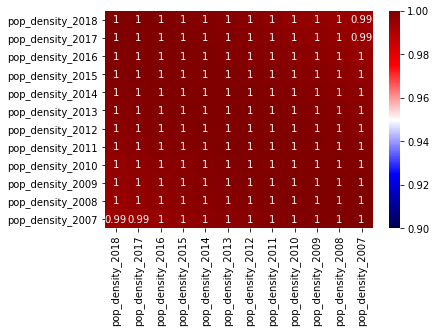

In [21]:
sns.heatmap(density_df.corr(), cmap="seismic", annot=True, vmin=0.9, vmax=1);

In [19]:
percent_df.corr()

,percent_homeless_2018,percent_homeless_2017,percent_homeless_2016,percent_homeless_2015,percent_homeless_2014,percent_homeless_2013,percent_homeless_2012,percent_homeless_2011,percent_homeless_2010,percent_homeless_2009,percent_homeless_2008,percent_homeless_2007
percent_homeless_2018,1.000000,0.976190,0.910504,0.910874,0.904618,0.821098,0.847168,0.836251,0.736849,0.758896,0.796074,0.817293
percent_homeless_2017,0.976190,1.000000,0.906183,0.923838,0.899014,0.826311,0.841809,0.831189,0.749095,0.752045,0.785748,0.793799
percent_homeless_2016,0.910504,0.906183,1.000000,0.974431,0.925360,0.869884,0.847087,0.841987,0.809851,0.800434,0.812041,0.819565
percent_homeless_2015,0.910874,0.923838,0.974431,1.000000,0.944217,0.899556,0.880149,0.870502,0.833907,0.814384,0.827851,0.842679
percent_homeless_2014,0.904618,0.899014,0.925360,0.944217,1.000000,0.936411,0.932282,0.927298,0.865167,0.860215,0.873567,0.839203
percent_homeless_2013,0.821098,0.826311,0.869884,0.899556,0.936411,1.000000,0.892560,0.884828,0.936066,0.942497,0.911663,0.788430
percent_homeless_2012,0.847168,0.841809,0.847087,0.880149,0.932282,0.892560,1.000000,0.991307,0.885421,0.852380,0.867628,0.878656
percent_homeless_2011,0.836251,0.831189,0.841987,0.870502,0.927298,0.884828,0.991307,1.000000,0.895754,0.854597,0.872753,0.875957
percent_homeless_2010,0.736849,0.749095,0.809851,0.833907,0.865167,0.936066,0.885421,0.895754,1.000000,0.936876,0.886406,0.760353
percent_homeless_2009,0.758896,0.752045,0.800434,0.814384,0.860215,0.942497,0.852380,0.854597,0.936876,1.000000,0.947544,0.795847


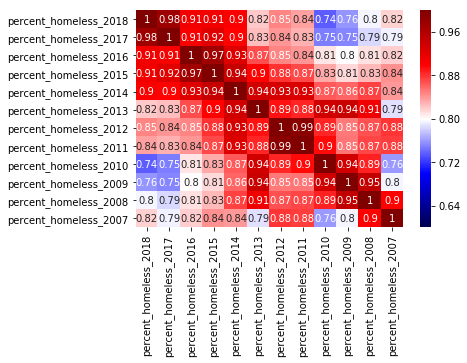

In [24]:
sns.heatmap(percent_df.corr(), cmap="seismic", annot=True, vmin=0.6, vmax=1);

In [25]:
# X1 = df[['X1','X3','X6']] # ANOTHER EXAMPLE: X = df.iloc[:, [1,3,6]] OR X = df.loc['X1','X3','X6']

X_p, y_p = percent_df.iloc[:, 2:], percent_df['percent_homeless_2018']

# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=.2, random_state=10)

In [26]:
X_train.shape, X_test.shape

((277, 11), (70, 11))

In [27]:
lm = LinearRegression() # = tool from sklearn

In [28]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
lm.coef_, lm.intercept_

(array([ 0.81479337,  0.4306312 , -0.54782683,  0.12083826,  0.09786436,
         0.0949981 , -0.06504414, -0.08727431,  0.07068906, -0.14532755,
         0.15504808]), 0.0002961185689953037)

In [30]:
y_test_pred = lm.predict(X_test)

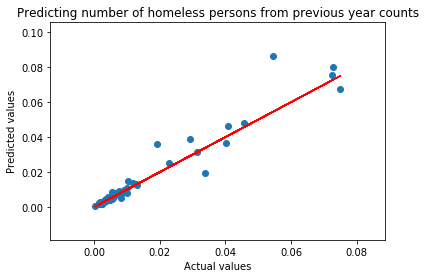

In [31]:
plt.scatter(y_test, y_test_pred)
# plt.xlim(0,10000)
# plt.ylim(0,10000)
plt.title("Predicting number of homeless persons from previous year counts")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_test,y_test,'r');

In [32]:
lm.score(X_test,y_test)

0.9100971592589145

In [33]:
lm.score(X_train,y_train)

0.9736729991214443

# Create function for testing relevance of features

In [206]:
all_data_model_2 = all_data_delta.copy()
lm = LinearRegression()

In [469]:
def train_test_features(X_columns):
    X, y = X_columns, all_data_model_2['percent_homeless_2018']
    # hold out 20% of the data for final testing
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
#     lm.fit(X_train,y_train)
#     lm = Ridge(alpha = 0.0001)
    lm = LinearRegression()
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    r2 = cross_val_score(lm, X, y, # estimator, features, target
                    cv=kf, # number of folds 
                    scoring='r2') # scoring metric
    n_obs = X.shape[0]
    adj_r2 = 1-(1-r2)*((n_obs-1)/(n_obs-len(X_columns.columns)-1))
#     print("Adjusted R**2:", adj_r2)
#     print("Mean Adjusted R**2:", adj_r2.mean())
    print("R2:", r2)
    print("average R2:", r2.mean())

In [431]:
all_data_model_2.columns

Index(['CoC Number', 'CoC Name', 'city', 'state', 'CoC Category', 'land_area',
       'Overall Homeless, 2018', 'Overall Homeless, 2017',
       'Overall Homeless, 2016', 'Overall Homeless, 2015',
       'Overall Homeless, 2014', 'Overall Homeless, 2013',
       'Overall Homeless, 2012', 'Overall Homeless, 2011',
       'Overall Homeless, 2010', 'Overall Homeless, 2009',
       'Overall Homeless, 2008', 'Overall Homeless, 2007', 'pop_2018',
       'pop_2017', 'pop_2016', 'pop_2015', 'pop_2014', 'pop_2013', 'pop_2012',
       'pop_2011', 'pop_2010', 'pop_2009', 'pop_2008', 'pop_2007',
       'percent_homeless_2018', 'percent_homeless_2017',
       'percent_homeless_2016', 'percent_homeless_2015',
       'percent_homeless_2014', 'percent_homeless_2013',
       'percent_homeless_2012', 'percent_homeless_2011',
       'percent_homeless_2010', 'percent_homeless_2009',
       'percent_homeless_2008', 'percent_homeless_2007', 'pop_density_2018',
       'pop_density_2017', 'pop_density_2016', 

# Overall Homelessness Trend

In [209]:
all_data_model_2[['percent_homeless_2018', 'percent_homeless_2017',
       'percent_homeless_2016', 'percent_homeless_2015',
       'percent_homeless_2014', 'percent_homeless_2013',
       'percent_homeless_2012', 'percent_homeless_2011',
       'percent_homeless_2010', 'percent_homeless_2009',
       'percent_homeless_2008', 'percent_homeless_2007']].describe()

,percent_homeless_2018,percent_homeless_2017,percent_homeless_2016,percent_homeless_2015,percent_homeless_2014,percent_homeless_2013,percent_homeless_2012,percent_homeless_2011,percent_homeless_2010,percent_homeless_2009,percent_homeless_2008,percent_homeless_2007
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,0.014992,0.015504,0.015797,0.016767,0.018541,0.020584,0.020576,0.020748,0.022914,0.022247,0.021025,0.021056
std,0.025281,0.026977,0.026824,0.028454,0.033179,0.040355,0.038020,0.038350,0.050819,0.045409,0.038025,0.035094
min,0.000037,0.000033,0.000030,0.000037,0.000035,0.000039,0.000046,0.000059,0.000044,0.000043,0.000048,0.000048
25%,0.003198,0.003118,0.003386,0.003555,0.003591,0.003589,0.003971,0.003977,0.004072,0.003806,0.004112,0.004133
50%,0.005850,0.006057,0.006055,0.006295,0.006665,0.006851,0.007167,0.007206,0.007783,0.007555,0.007184,0.007601
75%,0.012921,0.013169,0.013058,0.014806,0.015747,0.017106,0.018380,0.018610,0.018587,0.017640,0.017868,0.019703
max,0.161756,0.166174,0.160589,0.170199,0.230216,0.384277,0.292170,0.302411,0.477592,0.474104,0.328864,0.273133


In [210]:
years_list = [2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007]

In [211]:
percent_homeless_mean = all_data_model_2[['percent_homeless_2018', 'percent_homeless_2017',
       'percent_homeless_2016', 'percent_homeless_2015',
       'percent_homeless_2014', 'percent_homeless_2013',
       'percent_homeless_2012', 'percent_homeless_2011',
       'percent_homeless_2010', 'percent_homeless_2009',
       'percent_homeless_2008', 'percent_homeless_2007']].mean()

In [429]:
seattle_homeless = all_data_model_2[['percent_homeless_2018', 'percent_homeless_2017',
       'percent_homeless_2016', 'percent_homeless_2015',
       'percent_homeless_2014', 'percent_homeless_2013',
       'percent_homeless_2012', 'percent_homeless_2011',
       'percent_homeless_2010', 'percent_homeless_2009',
       'percent_homeless_2008', 'percent_homeless_2007']][all_data_model_2["city"] == "Seattle"]

In [430]:
seattle_homeless

,percent_homeless_2018,percent_homeless_2017,percent_homeless_2016,percent_homeless_2015,percent_homeless_2014,percent_homeless_2013,percent_homeless_2012,percent_homeless_2011,percent_homeless_2010,percent_homeless_2009,percent_homeless_2008,percent_homeless_2007


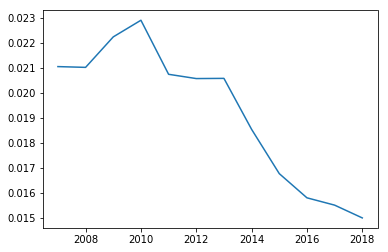

In [212]:
plt.plot(years_list, percent_homeless_mean)


# Test Features

## recent years

In [497]:
# first four features:
# X_columns_v1 = all_data_model_2[['percent_homeless_2008','percent_homeless_2008','percent_change_07_08','pop_density_2008','density_change_07_08']]
# X_columns_v1 = all_data_model_2[['percent_homeless_2008']]
# X_columns_v1 = all_data_model_2[['percent_homeless_2016','percent_homeless_2015']]
# X_columns_v1 = all_data_model_2[['percent_homeless_2016']]
X_columns_v1 = all_data_model_2[['percent_homeless_2017']]


train_test_features(X_columns_v1)

R2: [0.92725217 0.95442658 0.95793113 0.83606939 0.85215531 0.9910349
 0.98644346 0.96867894 0.96110348 0.99448369]
average R2: 0.9429579071480882


In [498]:
# add a feature; adj r**2 is already going down
X_columns_v2 = all_data_model_2[['percent_homeless_2017','percent_change_16_17',
                              'pop_density_2017','density_change_16_17', 
                              'percent_change_15_16']]
train_test_features(X_columns_v2)

R2: [0.89970183 0.95152201 0.93209517 0.77761262 0.78972267 0.98919451
 0.98058829 0.96619793 0.97072331 0.9932559 ]
average R2: 0.9250614245788384


In [482]:
# add feature: change in pop density for year-2; adj r**2 goes up!
X_columns_v3 = all_data_model_2[['percent_homeless_2017','percent_change_16_17',
                              'pop_density_2017','density_change_16_17', 
                              'density_change_15_16']]
train_test_features(X_columns_v3)

R2: [0.88440757 0.94762745 0.95518301 0.76778028 0.78335107 0.98856355
 0.98528952 0.9666219  0.96746447 0.99528259]
average R2: 0.924157140398416


In [483]:
# add another change in pop density column; adj r**2 is going down, so I'm done. yay
# prev cell is my model.
X_columns_v4 = all_data_model_2[['percent_homeless_2017','percent_change_16_17',
                              'pop_density_2017','density_change_16_17', 
                              'density_change_15_16', 'density_change_14_15']]
train_test_features(X_columns_v4)

R2: [0.88428799 0.94748678 0.95515316 0.76758526 0.78323968 0.98798021
 0.98529086 0.96662385 0.96712469 0.99528306]
average R2: 0.9240055547064081


In [484]:
# Here is my model:
X_columns_v3 = all_data_model_2[['percent_homeless_2017','percent_change_16_17',
                              'pop_density_2017','density_change_16_17', 
                              'density_change_15_16']]
train_test_features(X_columns_v3)

R2: [0.88440757 0.94762745 0.95518301 0.76778028 0.78335107 0.98856355
 0.98528952 0.9666219  0.96746447 0.99528259]
average R2: 0.924157140398416


In [485]:
X, y = X_columns_v3, all_data_model_2['percent_homeless_2018']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## ten years back

<BarContainer object of 1 artists>

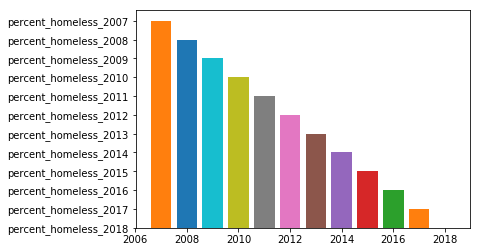

In [217]:
plt.bar(2018,'percent_homeless_2018') # this is stupid and doesn't tell me anything.
plt.bar(2017,'percent_homeless_2017')
plt.bar(2016,'percent_homeless_2016')
plt.bar(2015,'percent_homeless_2015')
plt.bar(2014,'percent_homeless_2014')
plt.bar(2013,'percent_homeless_2013')
plt.bar(2012,'percent_homeless_2012')
plt.bar(2011,'percent_homeless_2011')
plt.bar(2010,'percent_homeless_2010')
plt.bar(2009,'percent_homeless_2009')
plt.bar(2008,'percent_homeless_2008')
plt.bar(2007,'percent_homeless_2007')

In [305]:
X_columns_v4 = all_data_model_2[['percent_homeless_2016']] #,'percent_homeless_2015']] # ,'percent_homeless_2014']]
#                               'pop_density_2007', 
#                               'density_change_15_16']]
train_test_features(X_columns_v4)

Adjusted R**2: [0.8831703  0.87997379 0.74351048]
Mean Adjusted R**2: 0.8355515219527708


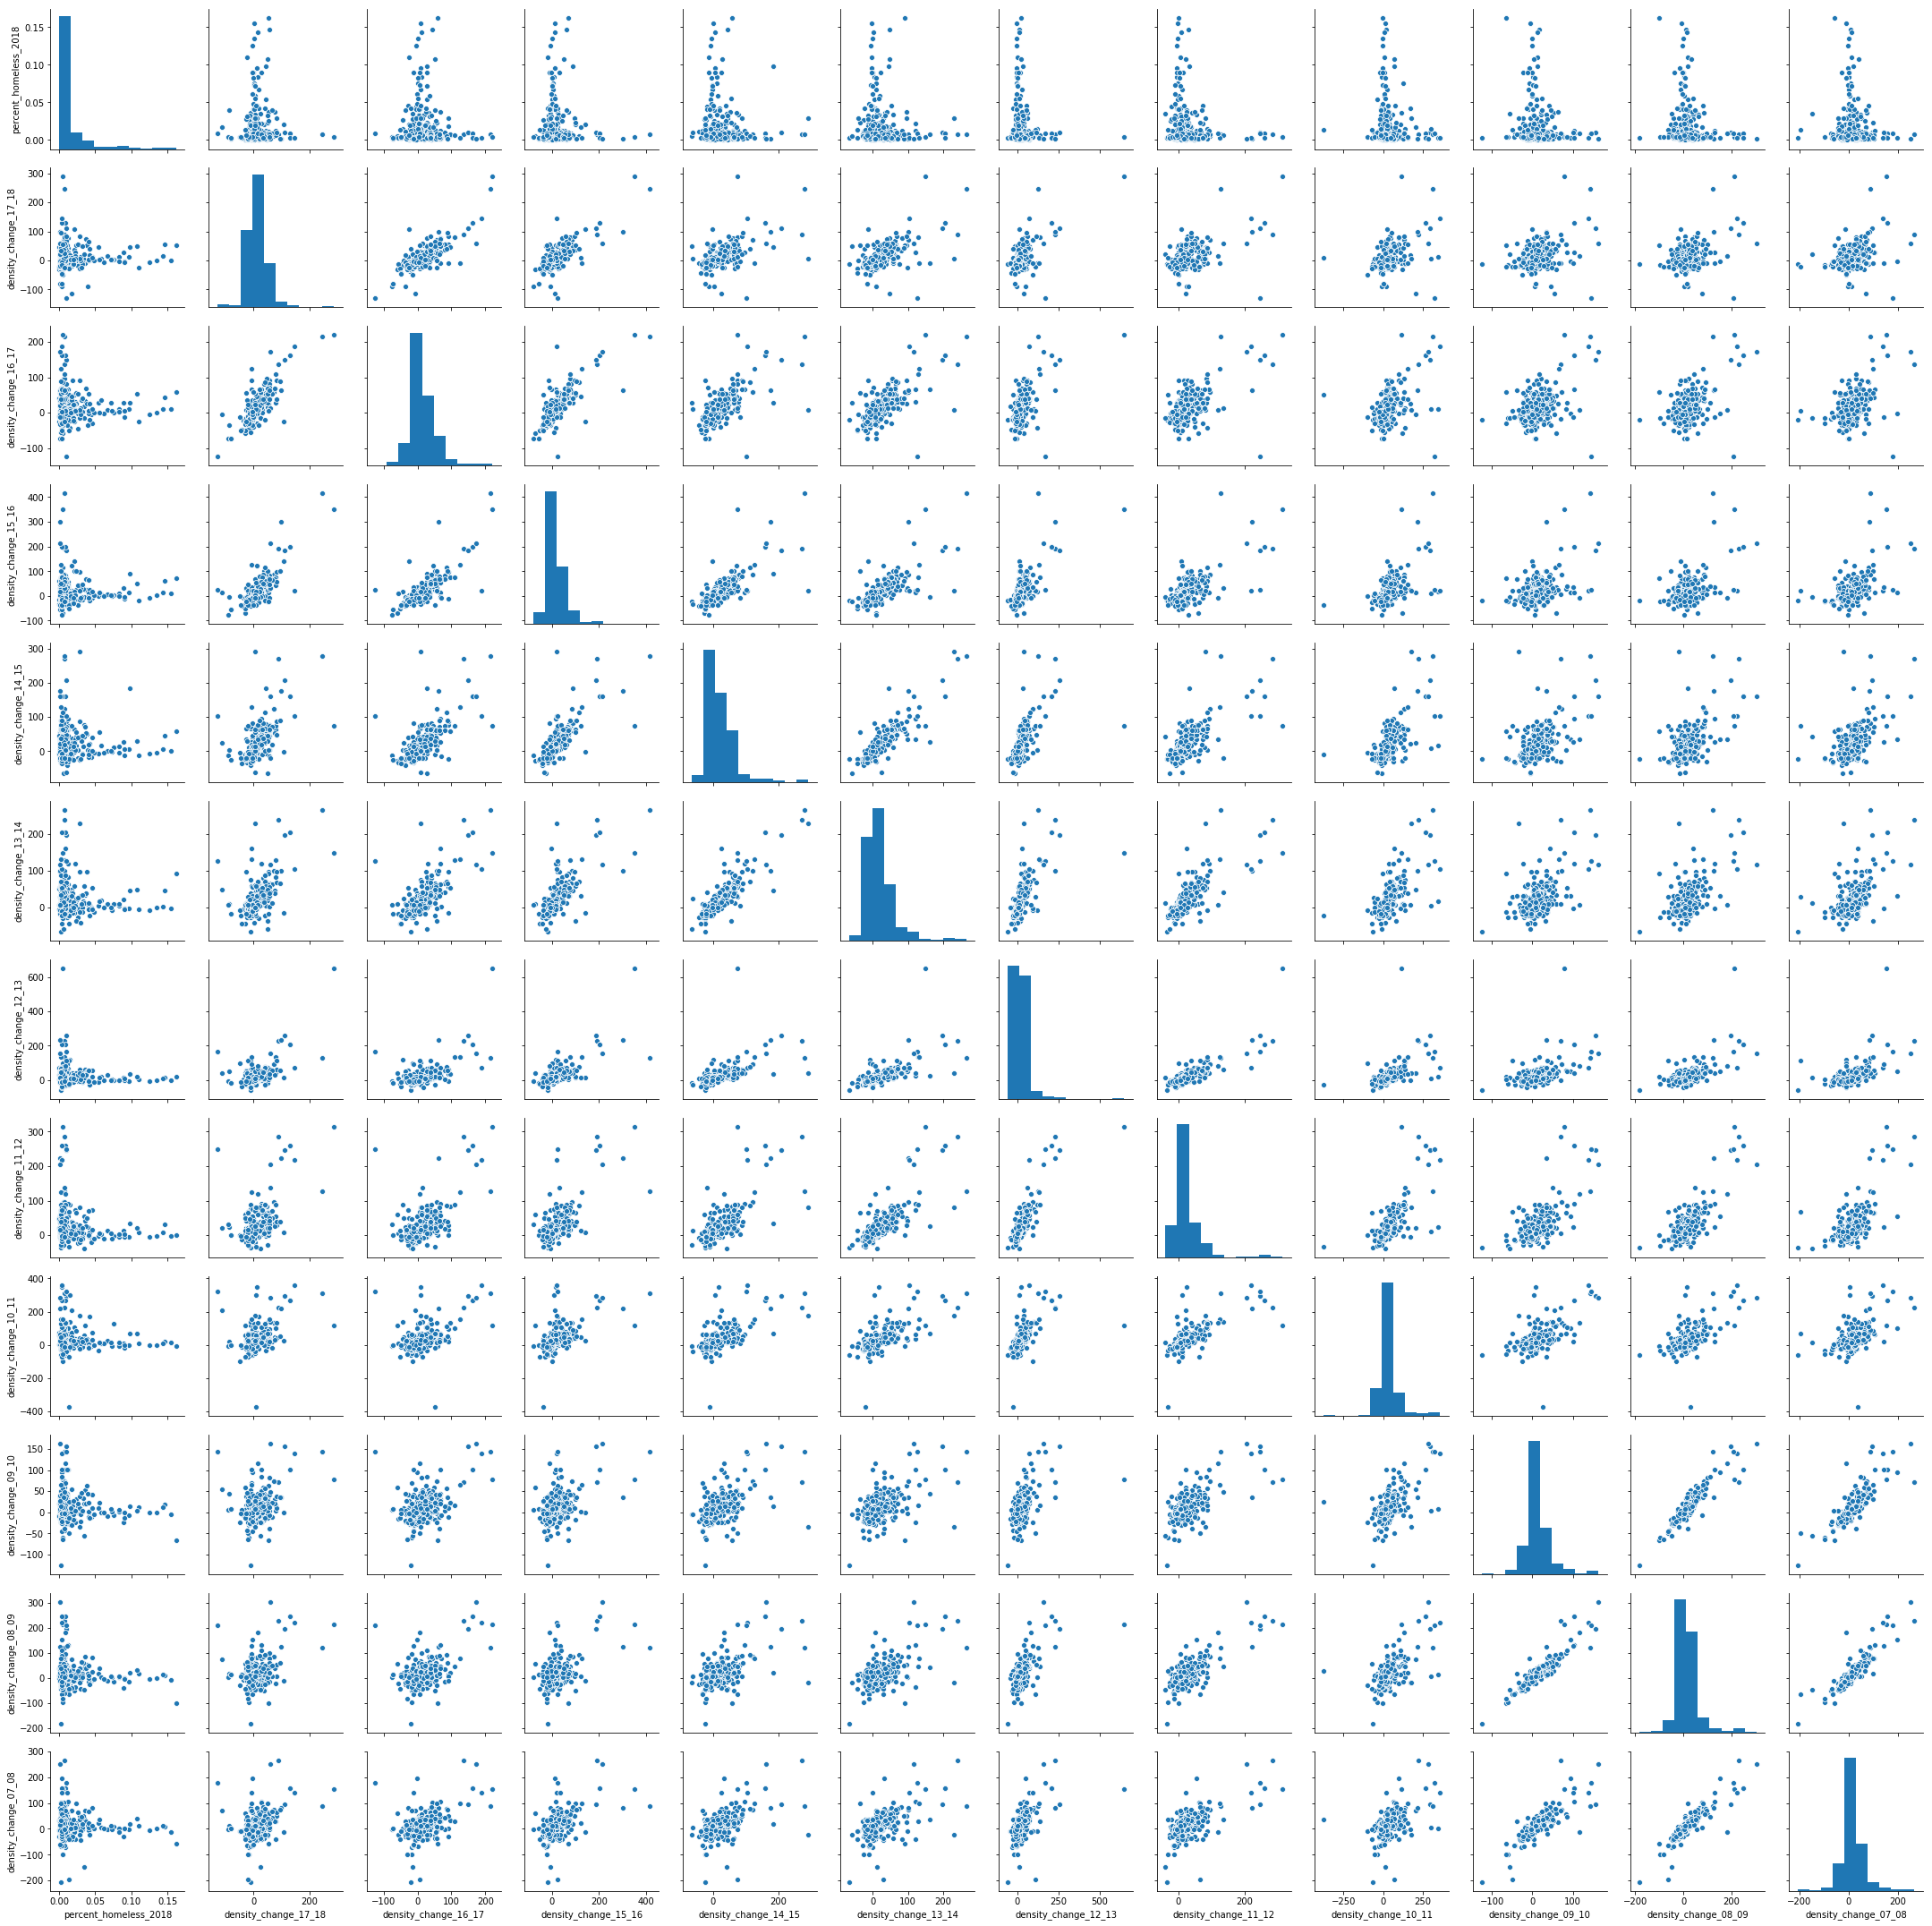

In [222]:
sns.pairplot(all_data_model_2[['percent_homeless_2018','density_change_17_18', 'density_change_16_17',
       'density_change_15_16', 'density_change_14_15', 'density_change_13_14',
       'density_change_12_13', 'density_change_11_12', 'density_change_10_11',
       'density_change_09_10', 'density_change_08_09', 'density_change_07_08',]])

# Pairplots

In [201]:
pairplot_df = all_data_model_2[['percent_homeless_2018','percent_homeless_2017','percent_homeless_2016','percent_change_16_17',
                              'pop_density_2017','density_change_16_17', 
                              'density_change_15_16']]

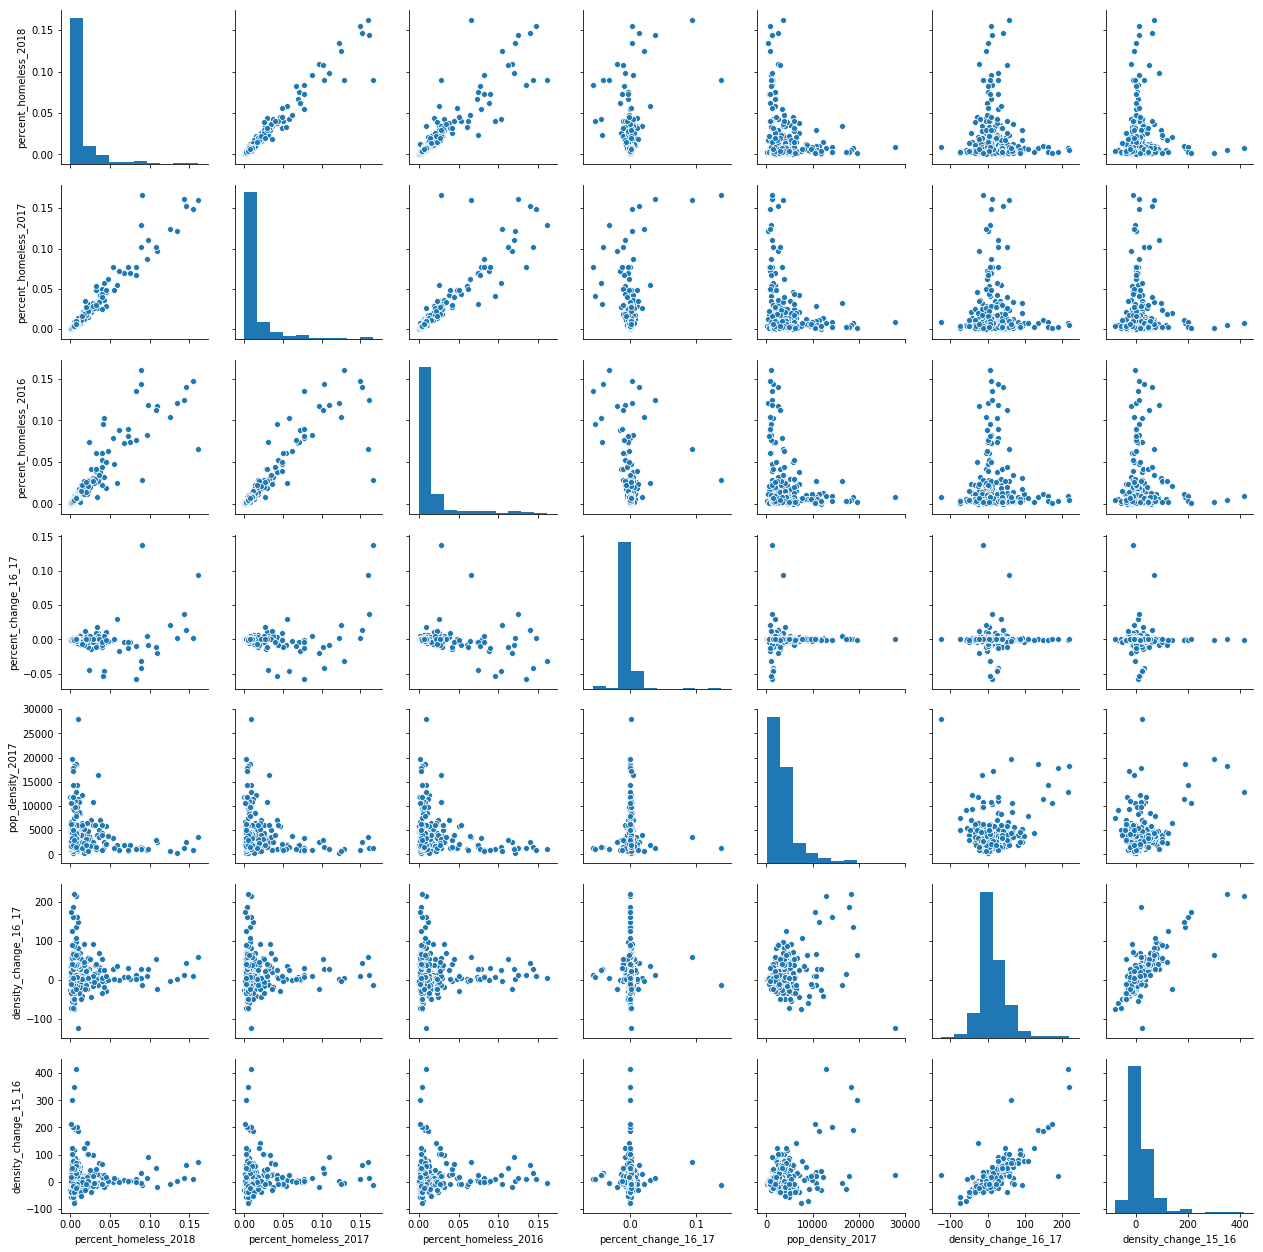

In [202]:
# sns.pairplot(np.log(pairplot_df)), boxcox (or other transformation) for negative numbers, 
sns.pairplot(pairplot_df)

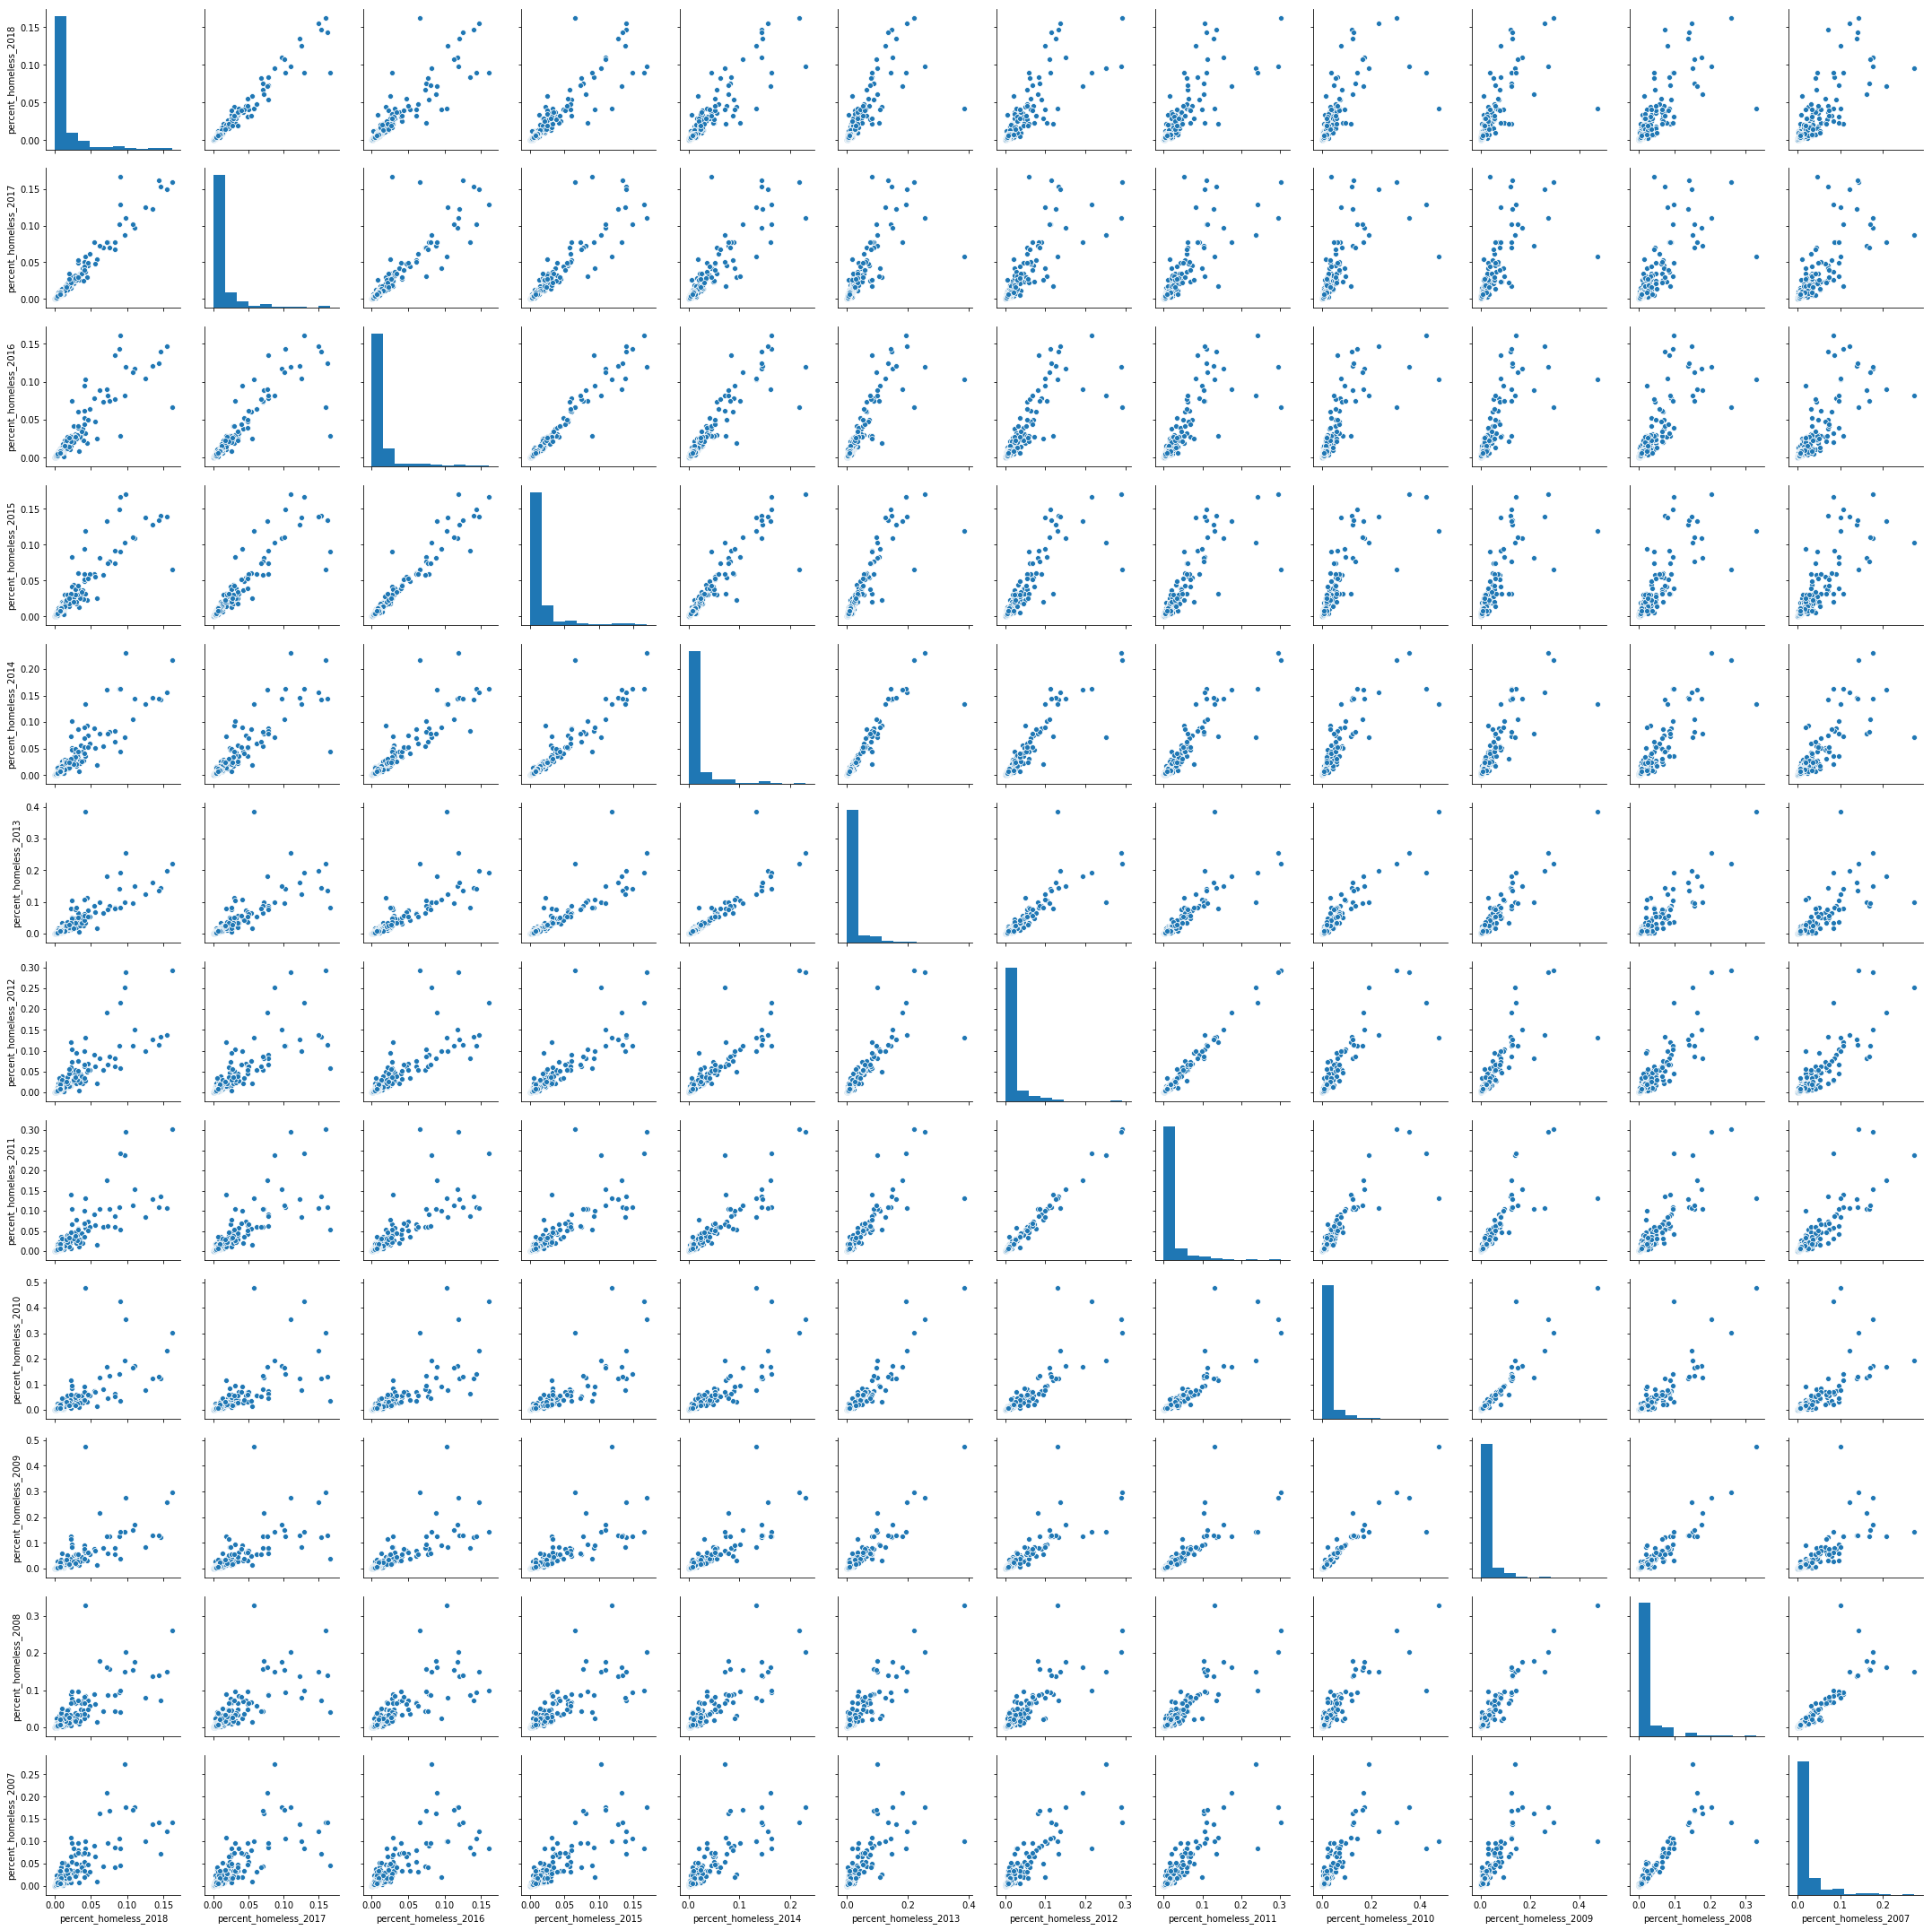

In [203]:
sns.pairplot(all_data_model_2[['percent_homeless_2018', 'percent_homeless_2017',
       'percent_homeless_2016', 'percent_homeless_2015',
       'percent_homeless_2014', 'percent_homeless_2013',
       'percent_homeless_2012', 'percent_homeless_2011',
       'percent_homeless_2010', 'percent_homeless_2009',
       'percent_homeless_2008', 'percent_homeless_2007',]])

# Models with Log Transformation of Population Density

# Pairplots with Log Transformation of Population Density

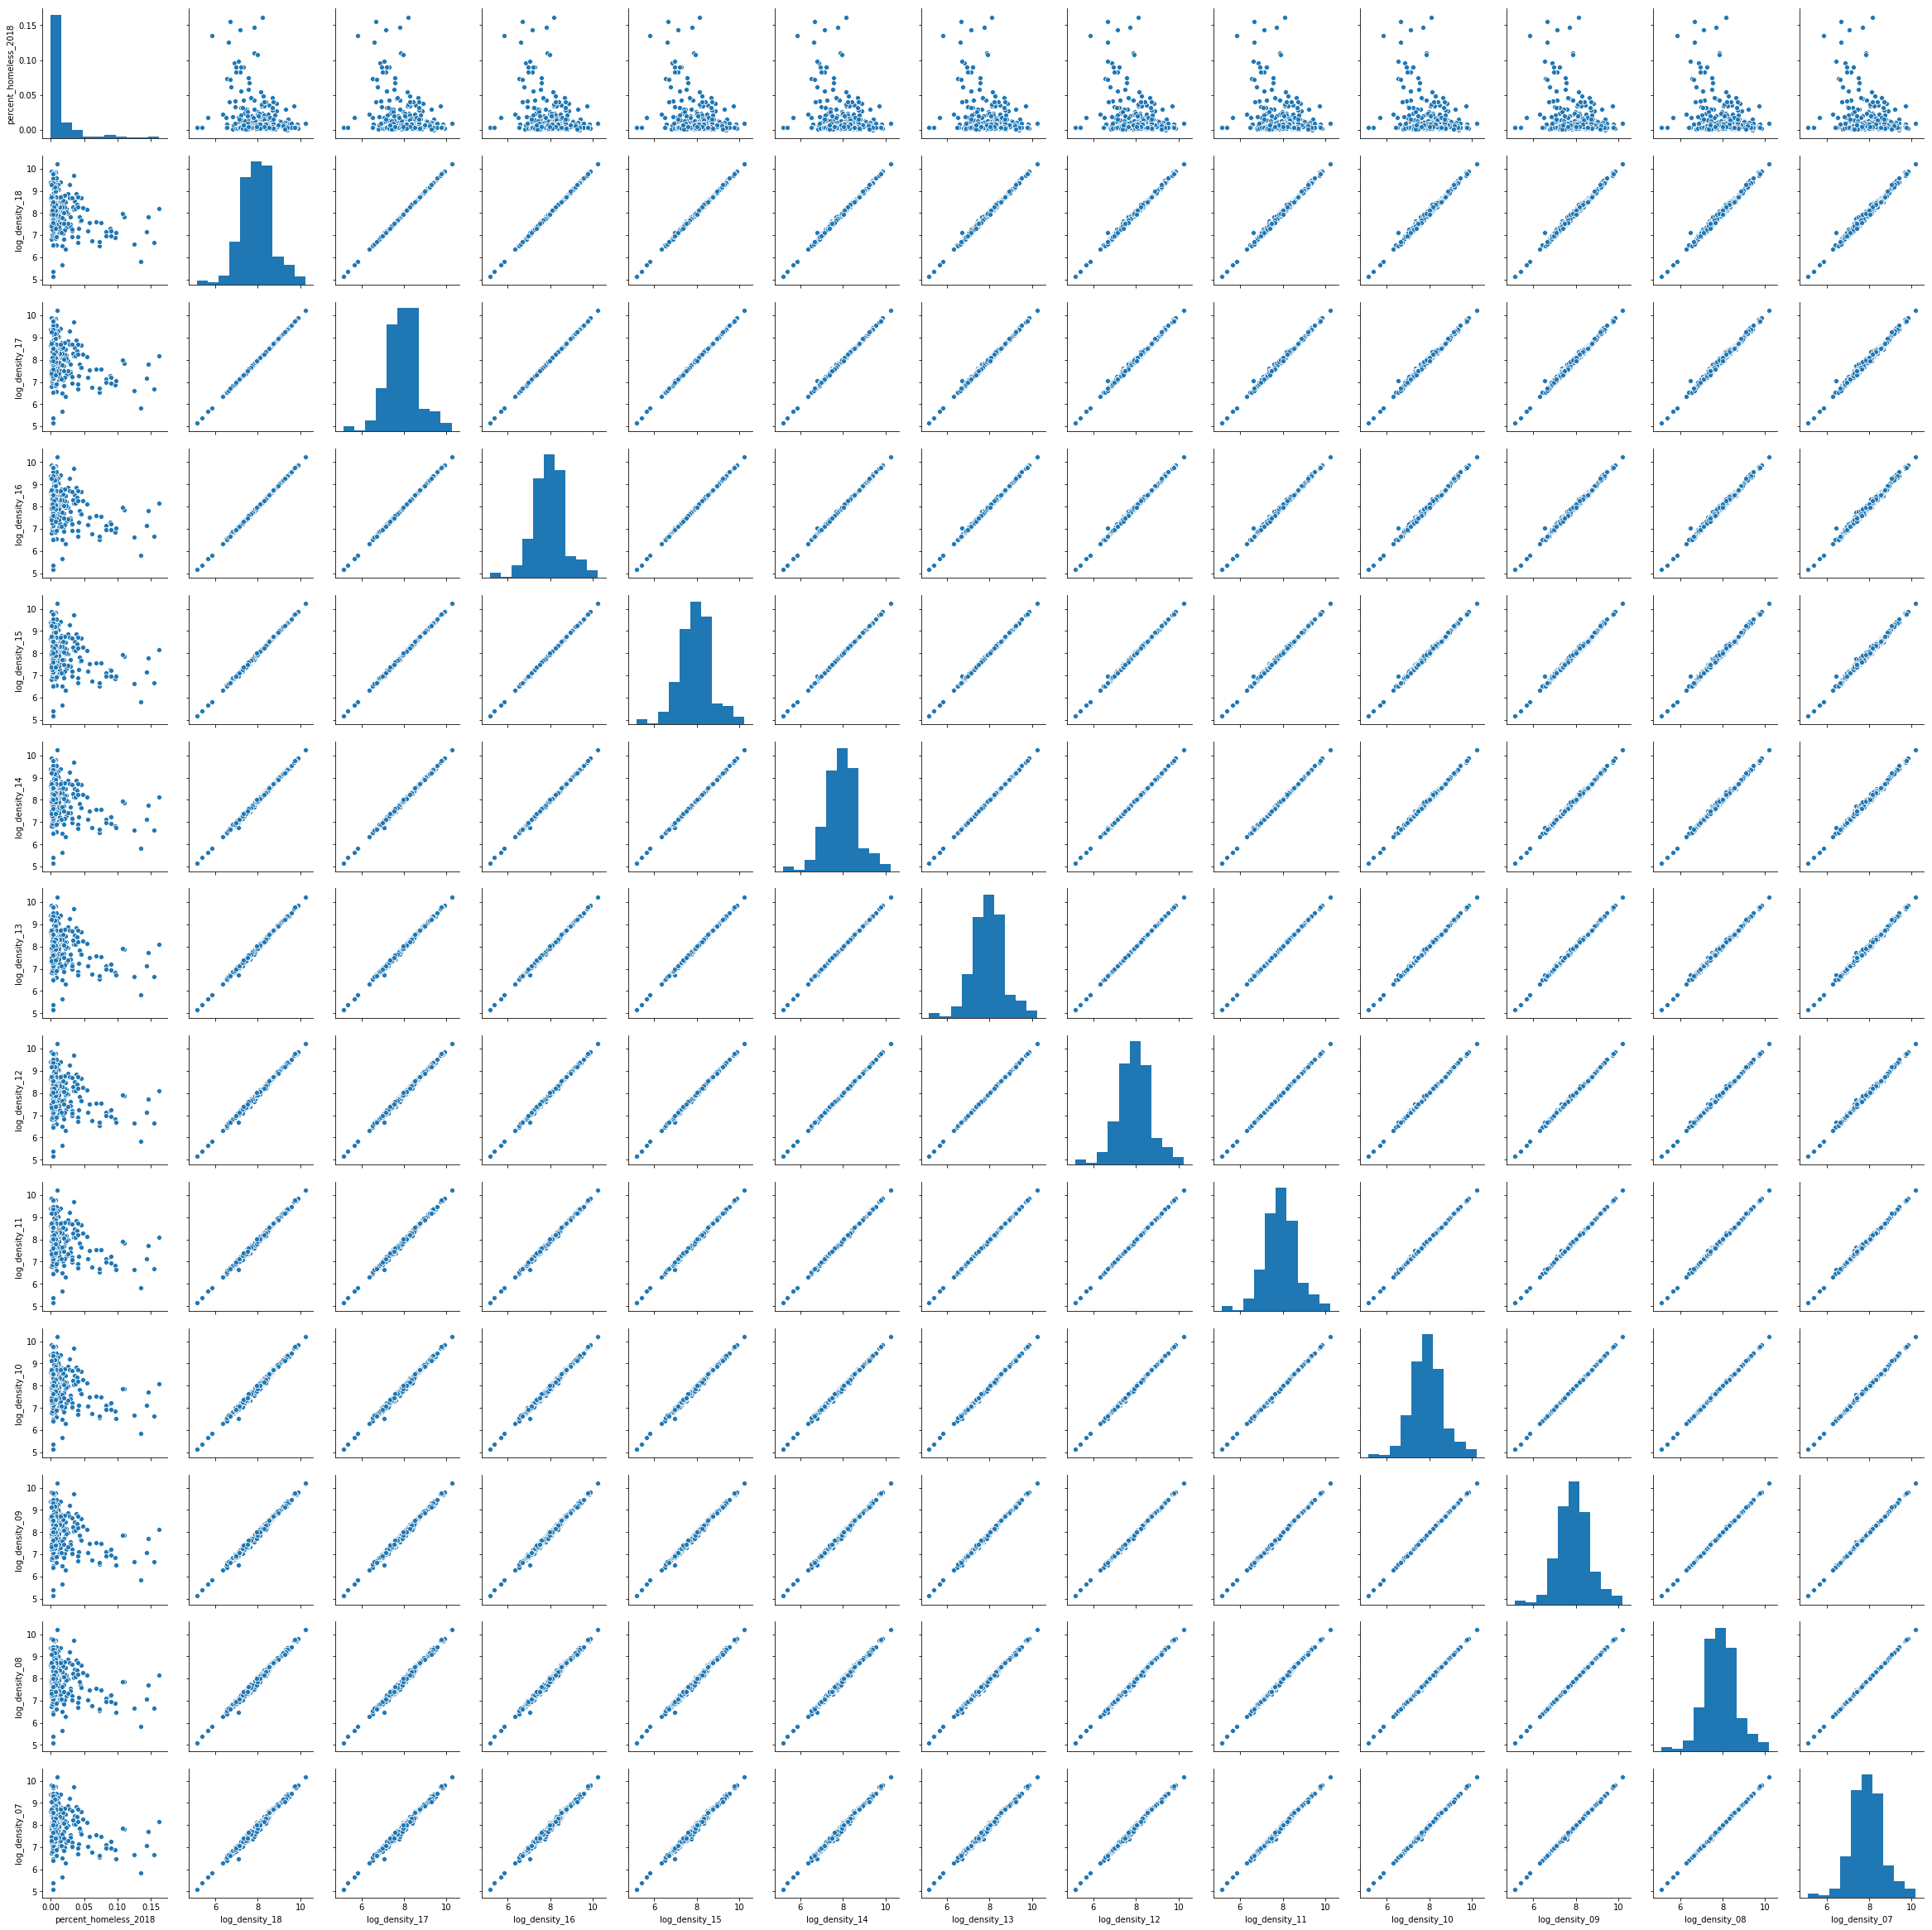

In [223]:
sns.pairplot(all_data_model_2[['percent_homeless_2018',
       'log_density_18', 'log_density_17', 'log_density_16', 'log_density_15','log_density_14', 'log_density_13', 'log_density_12', 'log_density_11',
       'log_density_10', 'log_density_09', 'log_density_08', 'log_density_07']])

# Model for predicting homelessness ~3 years in the future

In [310]:
X_columns_v4 = all_data_model_2[['percent_homeless_2016']]
                           
train_test_features(X_columns_v4) # works for 2016 predicting 2018

Adjusted R**2: [0.79228472 0.8844982  0.74249596]
Mean Adjusted R**2: 0.8064262898235315


In [307]:
def train_test_features_2(X_columns, year_to_predict):
    '''
    Prints adjusted R2 created by using data from Percent Homelessness
    Takes input: 
    X_columns = features (columns of df) to use in model
    year_to_predict = int to indicate year of interest 
    '''
    X, y = X_columns, all_data_model_2[f'percent_homeless_{year_to_predict}']
    # hold out 20% of the data for final testing
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
#     lm.fit(X_train,y_train)
    kf = KFold(n_splits=3, shuffle=True, random_state=None)
    r2 = cross_val_score(lm, X, y, # estimator, features, target
                    cv=kf, # number of folds 
                    scoring='r2') # scoring metric
    n_obs = X.shape[0]
    adj_r2 = 1-(1-r2)*((n_obs-1)/(n_obs-len(X_columns.columns)-1))
    print("Adjusted R**2:", adj_r2)
    print("Mean Adjusted R**2:", adj_r2.mean())

In [309]:
X_columns_v5 = all_data_model_2[['percent_homeless_2015']]
                           
train_test_features_2(X_columns_v5, 2017) # works for 2015 predicting 2017

Adjusted R**2: [0.90814832 0.87954655 0.8013289 ]
Mean Adjusted R**2: 0.8630079251364265


In [313]:
X_columns_v5 = all_data_model_2[['percent_homeless_2014']]
                           
train_test_features_2(X_columns_v5, 2016) # works for 2014 predicting 2016

Adjusted R**2: [0.91705599 0.72667697 0.9003829 ]
Mean Adjusted R**2: 0.8480386191346044


In [331]:
X_columns_v6 = all_data_model_2[['percent_homeless_2013']]
                           
train_test_features_2(X_columns_v6, 2015) # does not work for 2013 predicting 2015

Adjusted R**2: [0.38472546 0.83755457 0.79857823]
Mean Adjusted R**2: 0.6736194212471093


In [327]:
X_columns_v6 = all_data_model_2[['percent_homeless_2012']]
                           
train_test_features_2(X_columns_v6, 2014) # works for 2012 predicting 2014

Adjusted R**2: [0.8329732  0.75473905 0.93758325]
Mean Adjusted R**2: 0.8417651670359101


In [328]:
X_columns_v6 = all_data_model_2[['percent_homeless_2011']]
                           
train_test_features_2(X_columns_v6, 2013) # works for 2011 predicting 2013

Adjusted R**2: [0.84589455 0.81861005 0.69500204]
Mean Adjusted R**2: 0.7865022099608187


In [391]:
def train_test_mse(X_columns, year_to_predict):
    '''
    Prints adjusted R2 created by using data from Percent Homelessness
    Takes input: 
    X_columns = features (columns of df) to use in model
    year_to_predict = int to indicate year of interest 
    '''
    X, y = X_columns, all_data_model_2[f'percent_homeless_{year_to_predict}']
    # hold out 20% of the data for final testing
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
#     lm.fit(X_train,y_train)
    kf = KFold(n_splits=10, shuffle=True, random_state=None)
    mse = cross_val_score(lm, X, y, # estimator, features, target
                    cv=kf, # number of folds 
                    scoring='neg_mean_squared_error') # scoring metric
    n_obs = X.shape[0]
#     adj_r2 = 1-(1-r2)*((n_obs-1)/(n_obs-len(X_columns.columns)-1))
    print("Mean Squared Error array:", mse)
    print("Mean Squared Error:", np.mean(-mse))
    print("RMSE:", np.sqrt(np.mean(-mse)))

In [340]:
X_columns_v7 = all_data_model_2[['percent_homeless_2016']]
                           
train_test_mse(X_columns_v7, 2018) # works for 2016 predicting 2018

Mean Squared Error array: [-6.98180027e-05 -1.84378335e-04 -7.28133443e-05]
Mean Squared Error: 0.00010900322733474023
RMSE: 0.010440461069068752


In [ ]:
# RMSE = standard deviation of error

In [353]:
X_columns_v8 = all_data_model_2[['percent_homeless_2015']]
                           
train_test_mse(X_columns_v8, 2017) # works for 2015 predicting 2017

Mean Squared Error array: [-6.29052564e-05 -2.29220555e-04 -4.06896289e-05]
Mean Squared Error: 0.00011093847994251101
RMSE: 0.010532733735479647


In [347]:
X_columns_v9 = all_data_model_2[['percent_homeless_2017']]
                           
train_test_mse(X_columns_v9, 2018) # works for 2016 predicting 2018

Mean Squared Error array: [-6.65222146e-05 -1.95119635e-05 -1.39093159e-05]
Mean Squared Error: 3.331449800303909e-05
RMSE: 0.005771871273949124


In [422]:
np.std(all_data_model_2['percent_homeless_2018']) # standard deviation of the y_data itself


0.025244345339014415

In [354]:
# plot: RMSE of time-lag
# e.g. "now" (2018) on right y-axis
# show how RMSE increases/decreases as you use a greater time window


### look at different numbers of years removed from 2018, document RMSE

In [426]:
# X_columns_rmse_1 = all_data_model_2[['percent_homeless_2017',
#        'percent_homeless_2016', 'percent_homeless_2015',
#        'percent_homeless_2014', 'percent_homeless_2013',
#        'percent_homeless_2012', 'percent_homeless_2011',
#        'percent_homeless_2010', 'percent_homeless_2009',
#        'percent_homeless_2008', 'percent_homeless_2007']]

X_columns_rmse_1 = all_data_model_2[['percent_homeless_2017']]
                           
train_test_mse(X_columns_rmse_1, 2018) # RMSE: 0.0058513447910286285

Mean Squared Error array: [-3.33473797e-05 -1.94754793e-05 -1.36394259e-05 -2.85855020e-05
 -6.48745776e-06 -1.47080042e-05 -4.26643122e-05 -1.44012442e-04
 -3.04409275e-05 -9.61128522e-06]
Mean Squared Error: 3.429722156908583e-05
RMSE: 0.005856382976640602


In [427]:
X_columns_rmse_2 = all_data_model_2[['percent_homeless_2016']]
                           
train_test_mse(X_columns_rmse_2, 2018) # RMSE: 0.010707423681731816

Mean Squared Error array: [-1.11730467e-04 -5.27055641e-05 -5.19261451e-05 -2.30468071e-04
 -6.48880405e-05 -9.38907431e-06 -3.96791496e-05 -2.00844294e-04
 -3.57776169e-04 -5.96382417e-05]
Mean Squared Error: 0.00011790452159651658
RMSE: 0.010858384852109293


In [428]:
X_columns_rmse_3 = all_data_model_2[['percent_homeless_2015']]
                           
train_test_mse(X_columns_rmse_3, 2018) # RMSE: 0.010730041066927747

Mean Squared Error array: [-3.76128698e-04 -7.52037992e-05 -1.64904359e-05 -1.83123234e-05
 -1.11374325e-04 -2.01946139e-04 -1.50450011e-05 -6.50087109e-05
 -1.22717696e-04 -1.35785816e-04]
Mean Squared Error: 0.00011380129451566165
RMSE: 0.010667768956799807


In [402]:
X_columns_rmse_4 = all_data_model_2[['percent_homeless_2014']]
                           
train_test_mse(X_columns_rmse_4, 2018) # RMSE: 0.011021464380092792

Mean Squared Error array: [-9.37042809e-05 -8.45902422e-05 -9.56048811e-05 -1.06043450e-04
 -8.74540897e-05 -7.11959336e-05 -3.17026610e-04 -9.00997522e-06
 -1.72834367e-04 -1.77262941e-04]
Mean Squared Error: 0.0001214726770816542
RMSE: 0.011021464380092792


In [405]:
X_columns_rmse_5 = all_data_model_2[['percent_homeless_2013']]
                           
train_test_mse(X_columns_rmse_5, 2018) # RMSE: 0.016384919717634974

Mean Squared Error array: [-1.28250702e-03 -1.01307435e-04 -6.61215062e-05 -4.05767546e-04
 -1.49956350e-04 -2.97778323e-04 -6.31822614e-05 -1.32890893e-04
 -1.03438240e-04 -8.17063704e-05]
Mean Squared Error: 0.0002684655941533433
RMSE: 0.016384919717634974


In [406]:
X_columns_rmse_6 = all_data_model_2[['percent_homeless_2012']]
                           
train_test_mse(X_columns_rmse_6, 2018) # RMSE: 0.01354094001994832

Mean Squared Error array: [-3.36792149e-04 -1.11436950e-04 -1.73008825e-04 -4.25561194e-04
 -1.83924734e-05 -1.01870475e-05 -3.22355559e-04 -6.33803022e-05
 -1.85890625e-04 -1.86565441e-04]
Mean Squared Error: 0.000183357056623838
RMSE: 0.01354094001994832


In [421]:
X_columns_rmse_7 = all_data_model_2[['percent_homeless_2011']]
                           
train_test_mse(X_columns_rmse_7, 2018) # RMSE: 0.014517887410029759

Mean Squared Error array: [-8.84417202e-05 -1.27317799e-04 -3.64229490e-04 -3.51289331e-04
 -4.15468464e-04 -1.07544806e-04 -1.54383666e-04 -1.28509578e-04
 -1.25657947e-04 -2.44847748e-04]
Mean Squared Error: 0.00021076905485030057
RMSE: 0.014517887410029759


In [420]:
X_columns_rmse_8 = all_data_model_2[['percent_homeless_2010']]
                           
train_test_mse(X_columns_rmse_8, 2018) # RMSE: 0.01829823418313925

Mean Squared Error array: [-5.63619796e-04 -1.49255749e-04 -4.17658624e-05 -2.41185068e-04
 -3.57734251e-04 -2.11790722e-04 -4.76389451e-05 -9.71167480e-04
 -1.22866775e-04 -6.41229093e-04]
Mean Squared Error: 0.00033482537422100577
RMSE: 0.01829823418313925


In [415]:
X_columns_rmse_9 = all_data_model_2[['percent_homeless_2009']]
                           
train_test_mse(X_columns_rmse_9, 2018) # RMSE: 0.018589719911917987

Mean Squared Error array: [-1.04972195e-04 -3.46160483e-05 -1.09721407e-04 -5.67066632e-04
 -2.37052340e-04 -2.28428699e-04 -8.17223080e-05 -5.77390504e-05
 -2.02656016e-04 -1.83180217e-03]
Mean Squared Error: 0.0003455776864035601
RMSE: 0.018589719911917987


In [410]:
X_columns_rmse_10 = all_data_model_2[['percent_homeless_2008']]
                           
train_test_mse(X_columns_rmse_10, 2018) # RMSE: 0.01638921279145052

Mean Squared Error array: [-2.71032827e-04 -4.00100964e-05 -2.83101269e-04 -7.71969626e-05
 -2.37964722e-04 -9.26534052e-05 -3.89023589e-04 -1.69047600e-04
 -8.57001773e-04 -2.69030715e-04]
Mean Squared Error: 0.00026860629592344537
RMSE: 0.01638921279145052


In [411]:
X_columns_rmse_11 = all_data_model_2[['percent_homeless_2007']]
                           
train_test_mse(X_columns_rmse_11, 2018) # RMSE: 0.014832776709316712

Mean Squared Error array: [-9.47214875e-05 -1.96113220e-04 -3.68897941e-04 -3.44102827e-04
 -4.09473762e-05 -2.57271317e-04 -3.74156209e-05 -2.94522879e-04
 -5.34713234e-04 -3.14067471e-05]
Mean Squared Error: 0.0002200112649084483
RMSE: 0.014832776709316712


In [425]:
all_data_model_2.head()

,CoC Number,CoC Name,city,state,CoC Category,land_area,"Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015",...,log_density_16,log_density_15,log_density_14,log_density_13,log_density_12,log_density_11,log_density_10,log_density_09,log_density_08,log_density_07
0,AK-500,Anchorage CoC,Anchorage,AK,Other Urban CoCs,1704.68,1094,1128,1105,1208,...,5.161082,5.162417,5.170162,5.174248,5.164498,5.157502,5.142780,5.128461,5.106947,5.097089
1,AK-501,Alaska Balance of State CoC,Anchorage,AK,Rural CoCs,1704.68,922,717,835,748,...,5.161082,5.162417,5.170162,5.174248,5.164498,5.157502,5.142780,5.128461,5.106947,5.097089
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Birmingham,AL,Suburban CoCs,146.07,901,1092,1228,1153,...,7.277592,7.278854,7.276044,7.276617,7.274337,7.278206,7.281373,7.291485,7.301283,7.312193
3,AL-501,Mobile City & County/Baldwin County CoC,Mobile,AL,Other Urban CoCs,139.11,551,606,623,578,...,7.229387,7.231947,7.235072,7.238052,7.239616,7.240307,7.246059,7.249359,7.250171,7.248204
4,AL-502,Florence/Northwest Alabama CoC,Florence,AL,Rural CoCs,26.00,256,155,337,245,...,7.337287,7.336210,7.343153,7.337488,7.331765,7.326769,7.321367,7.317876,7.315065,7.299719
